In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("seaborn")

In [3]:
X=np.array(pd.read_csv("logisticX.csv",header=None))
Y=np.array(pd.read_csv("logisticY.csv",header=None))

# Algorithm


In [4]:
def hypothesis(x,w,b):
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
        
    return -err/m


def Batchgradient(y,x,w,b,BatchSize):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    a=y.shape[0]
    idx=np.arange(a)
    np.random.shuffle(idx)
    idx=idx[:BatchSize]
    
    for i in idx:
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
        
    grad_w /= len(idx)
    grad_b /= len(idx)
    
    return [grad_w,grad_b]

def gradient(y,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    a=y.shape[0]
   
    
    for i in range(a):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
        
    grad_w /= a
    grad_b /= a
    
    return [grad_w,grad_b]

def MBgrad_descent(x,y,learning_rate=0.01,BatchSize=1):
    w=np.zeros(x.shape[1])
    b=0
    loss = []
    for i in range(1000):
        loss.append(error(y,x,w,b))
        [grad_w,grad_b] = Batchgradient(y,x,w,b,BatchSize)

        w = w + learning_rate*grad_w
        b = b + learning_rate*grad_b
    
    return loss,w,b


def grad_descent(x,y,learning_rate=0.01):
    w=np.zeros(x.shape[1])
    b=0
    loss = []
    for i in range(1000):
        loss.append(error(y,x,w,b))
        [grad_w,grad_b] = gradient(y,x,w,b)

        w = w + learning_rate*grad_w
        b = b + learning_rate*grad_b
    
    return loss,w,b

In [5]:


l,W,b = grad_descent(X,Y,learning_rate=0.01)


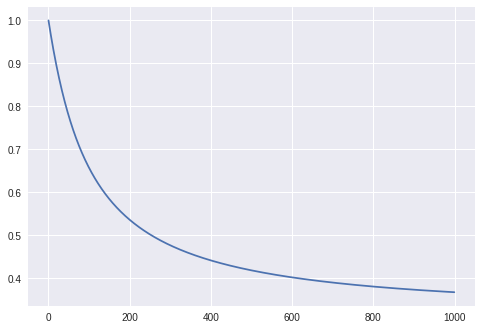

In [6]:
plt.plot(l)

In [7]:
l2,W2,b2 = MBgrad_descent(X,Y,learning_rate=0.01,BatchSize=10)

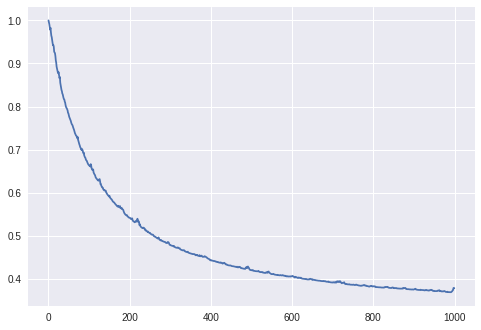

In [8]:
plt.plot(l2)

In [9]:
X0=np.argwhere(Y==0)[:,0]
X1=np.argwhere(Y==1)[:,0]

In [10]:
X_0=X[X0,:]
X_1=X[X1,:]

# Boundary plot for normal gradient decent

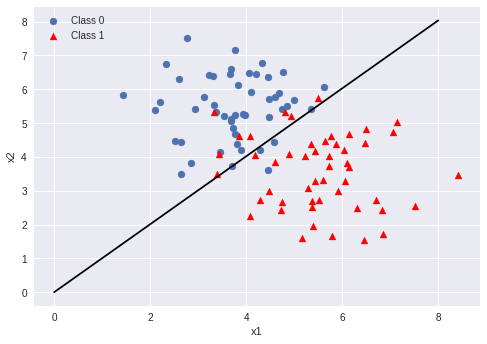

In [11]:
plt.scatter(X_0[:,0],X_0[:,1],label='Class 0')
plt.scatter(X_1[:,0],X_1[:,1],color='r',marker='^',label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(0,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

# Boundary plot for MinjBatch gradient decent

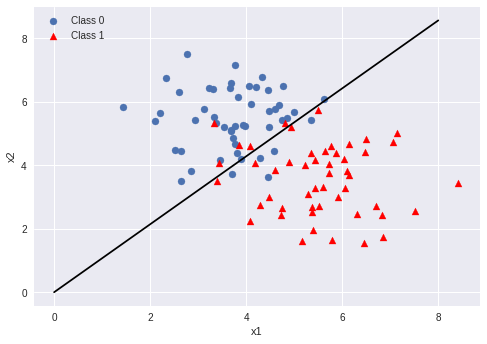

In [12]:
plt.scatter(X_0[:,0],X_0[:,1],label='Class 0')
plt.scatter(X_1[:,0],X_1[:,1],color='r',marker='^',label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(0,8,10)
y = -(W2[0]*x + b)/W2[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()